In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

# !pip install geopandas
# !pip install wordcloud

# Movies
Link to the dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies <br>
Data that is contained in the datset comes from IMDb platform which is the most popular database on infromations related to films. The csv file used in this notebook contains 6820 movies (220 movies per year, 1986-2016).

In [37]:
df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


- **budget**: the budget of a movie. Some movies don't have this information so value is 0
- **company**: the production company
- **country**: country of origin
- **director**: the director
- **genre**: main genre of the movie.
- **gross**: revenue of the movie
- **name**: name of the movie
- **rating**: rating of the movie (R, PG, etc.)
- **released**: release date (YYYY-MM-DD)
- **runtime**: duration of the movie
- **score**: IMDb user rating
- **votes**: number of user votes
- **star**: main actor/actress
- **writer**: writer of the movie
- **year**: year of release

In [38]:
print(df.columns.values)
categorical_df = df[['company', 'director', 'genre', 'name', 'country', 'writer', 'star', 'rating']]
numerical_df = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]

numerical_df.describe()
# df['budget'].isna().sum()# it returns 2171 (meaning that 2171 movies does not have information about budget)

['name' 'rating' 'genre' 'year' 'released' 'score' 'votes' 'director'
 'writer' 'star' 'country' 'budget' 'gross' 'company' 'runtime']


,budget,gross,runtime,score,votes,year
count,5.497000e+03,7.479000e+03,7664.000000,7665.000000,7.665000e+03,7668.000000
mean,3.558988e+07,7.850054e+07,107.261613,6.390411,8.810850e+04,2000.405451
std,4.145730e+07,1.657251e+08,18.581247,0.968842,1.633238e+05,11.153508
min,3.000000e+03,3.090000e+02,55.000000,1.900000,7.000000e+00,1980.000000
25%,1.000000e+07,4.532056e+06,95.000000,5.800000,9.100000e+03,1991.000000
50%,2.050000e+07,2.020576e+07,104.000000,6.500000,3.300000e+04,2000.000000
75%,4.500000e+07,7.601669e+07,116.000000,7.100000,9.300000e+04,2010.000000
max,3.560000e+08,2.847246e+09,366.000000,9.300000,2.400000e+06,2020.000000


> Notes:<br>
> - variables from `numerical_df` are purely numerical because we can do mathematical operations on them.
> - variables like `company`, `director`, `writer`, or `star` are categorical because assign a movie to a specific person (or company) responsible for its creation. Other variables like `genre`, `country` or `rating` are obvious when it comes to assiging it to categorical group.
> - information returned by `describe` function are rather meaningful, but it is worth noting that column budget is not complete because many movies (especially older) didn't provide information about their budget

## Correlations


Text(0, 0.5, 'revenue')

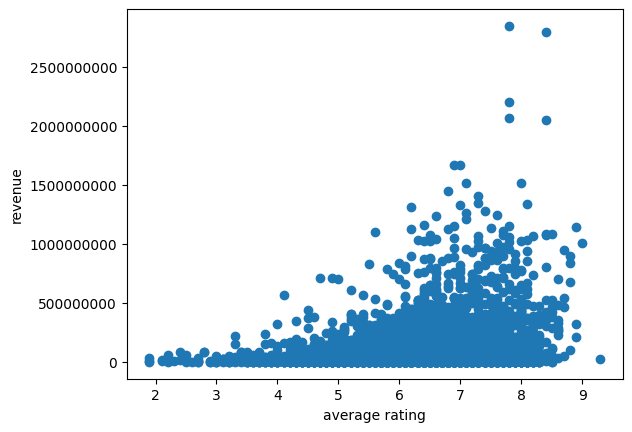

In [39]:
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(df['score'], df['gross'])
plt.xlabel('average rating')
plt.ylabel('revenue')

> Notes:
> - from the plot above we can see that in general better viewers ratings translate into higher revenue
> - above the average of 8 we can spot more noticable outliers
> - the movie with the highest profit is `Avatar` by James Cameron (see code below)
> - the movie with the highest score (viewers ratings) is `The Shawshank Redemption` by Stephen King

In [40]:
df.nlargest(3, 'gross')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0


In [41]:
df.nlargest(3, 'score')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Animation'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'History'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Musical')])

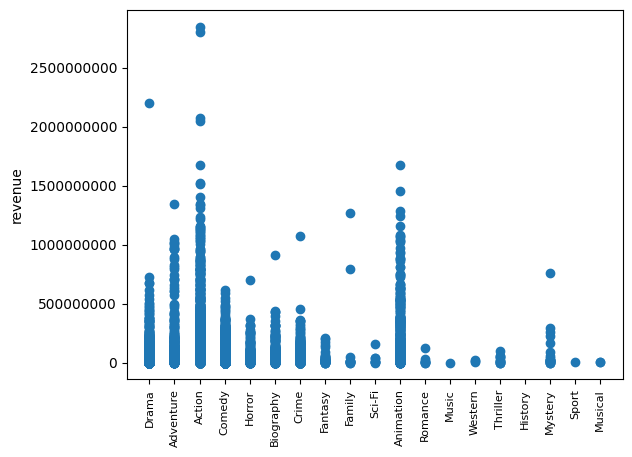

In [42]:
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('revenue')
plt.scatter(df['genre'], df['gross'])
plt.xticks(rotation=90, fontsize=8)

> Notes:
> - genre of movie also have impact on its revenue
> - the most profitable are movies categorized as `Action`, `Animation`, `Adventure` and `Drama`
> - some genres have more noticable outliers than others (for example `Drama` or `Action`)
> - to hightlight outliers and median i also prepared the box plot (see plot below)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Thriller'),
  Text(19, 0, 'Western')])

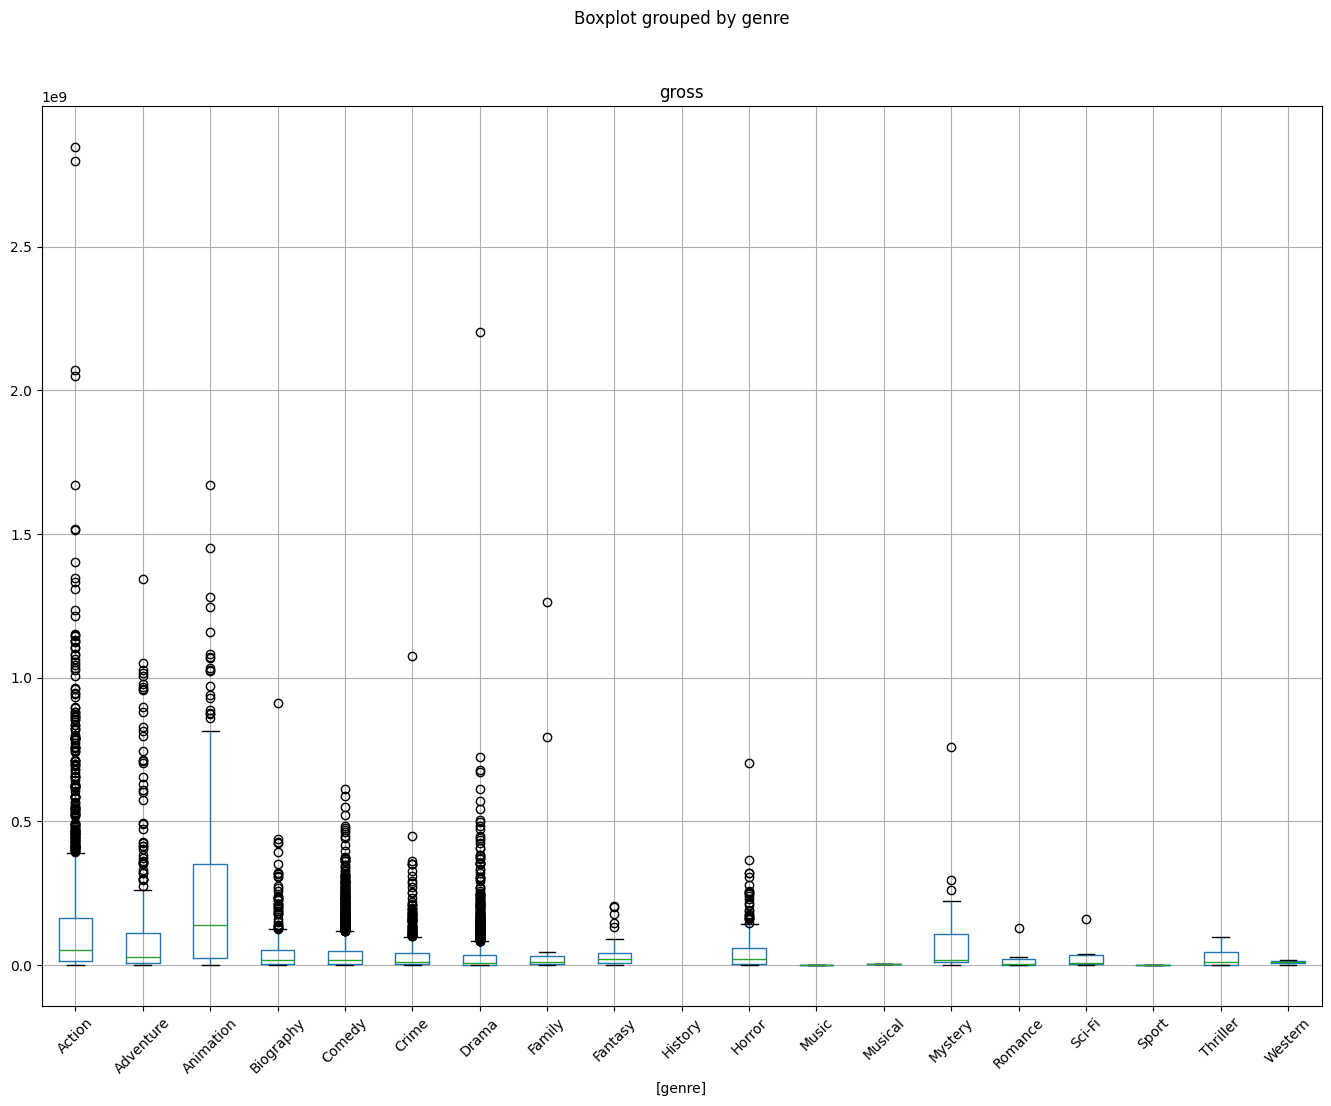

In [43]:
box_df = df[['genre', 'gross']]
box_df.boxplot(by='genre', figsize=(16, 12))
plt.xticks(rotation=45)

> Notes:
> - above box plot provided us more detailed information about movies revenue by its category
> - median of movies revenues is the highest for `animations`

Text(0, 0.5, 'budget')

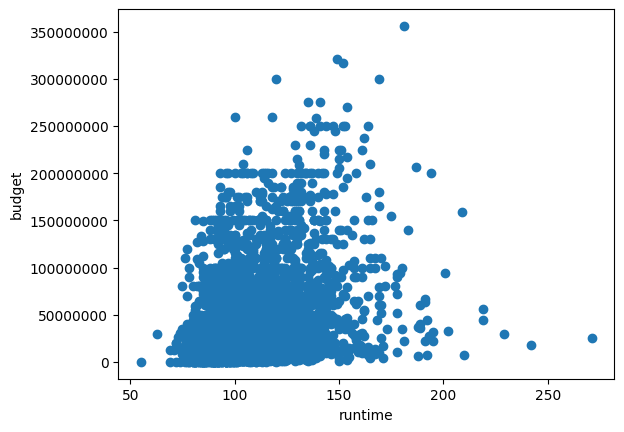

In [44]:
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(df['runtime'], df['budget'])
plt.xlabel('runtime')
plt.ylabel('budget')


> Notes:
> - the budget of a given movie is correlated to its runtime
> - in genreal the longer the movie, the bigger the budget
> - above correlation is weak
> - the movie with the highest budget was `Avengers: Endgame`
> - the longest movie in the dataset lasts for over 6 hours (`The Best of Youth`)

In [45]:
df.nlargest(1, 'budget')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0


In [46]:
df.nlargest(1, 'runtime')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,NaN,2799773.0,BiBi Film,366.0


(<Figure size 2000x2000 with 3 Axes>,
 {('1980', 'Drama'): (0.0, 0.0, 0.1515151515151515, 0.009877518767285655),
  ('1980', 'Adventure'): (0.15476190476190474,
   0.0,
   0.07575757575757575,
   0.009877518767285655),
  ('1980', 'Action'): (0.2337662337662337,
   0.0,
   0.1515151515151515,
   0.009877518767285655),
  ('1980', 'Comedy'): (0.3885281385281385,
   0.0,
   0.3896103896103895,
   0.009877518767285655),
  ('1980', 'Horror'): (0.7813852813852812,
   0.0,
   0.06493506493506492,
   0.009877518767285655),
  ('1980', 'Biography'): (0.8495670995670994,
   0.0,
   0.06493506493506501,
   0.009877518767285655),
  ('1980', 'Crime'): (0.9177489177489176,
   0.0,
   0.04329004329004324,
   0.009877518767285655),
  ('1980', 'Fantasy'): (0.9642857142857141,
   0.0,
   0.010822510822510782,
   0.009877518767285655),
  ('1980', 'Animation'): (0.9783549783549782,
   0.0,
   0.021645021645021672,
   0.009877518767285655),
  ('1981', 'Drama'): (0.0,
   0.014044185433952321,
   0.185950413223

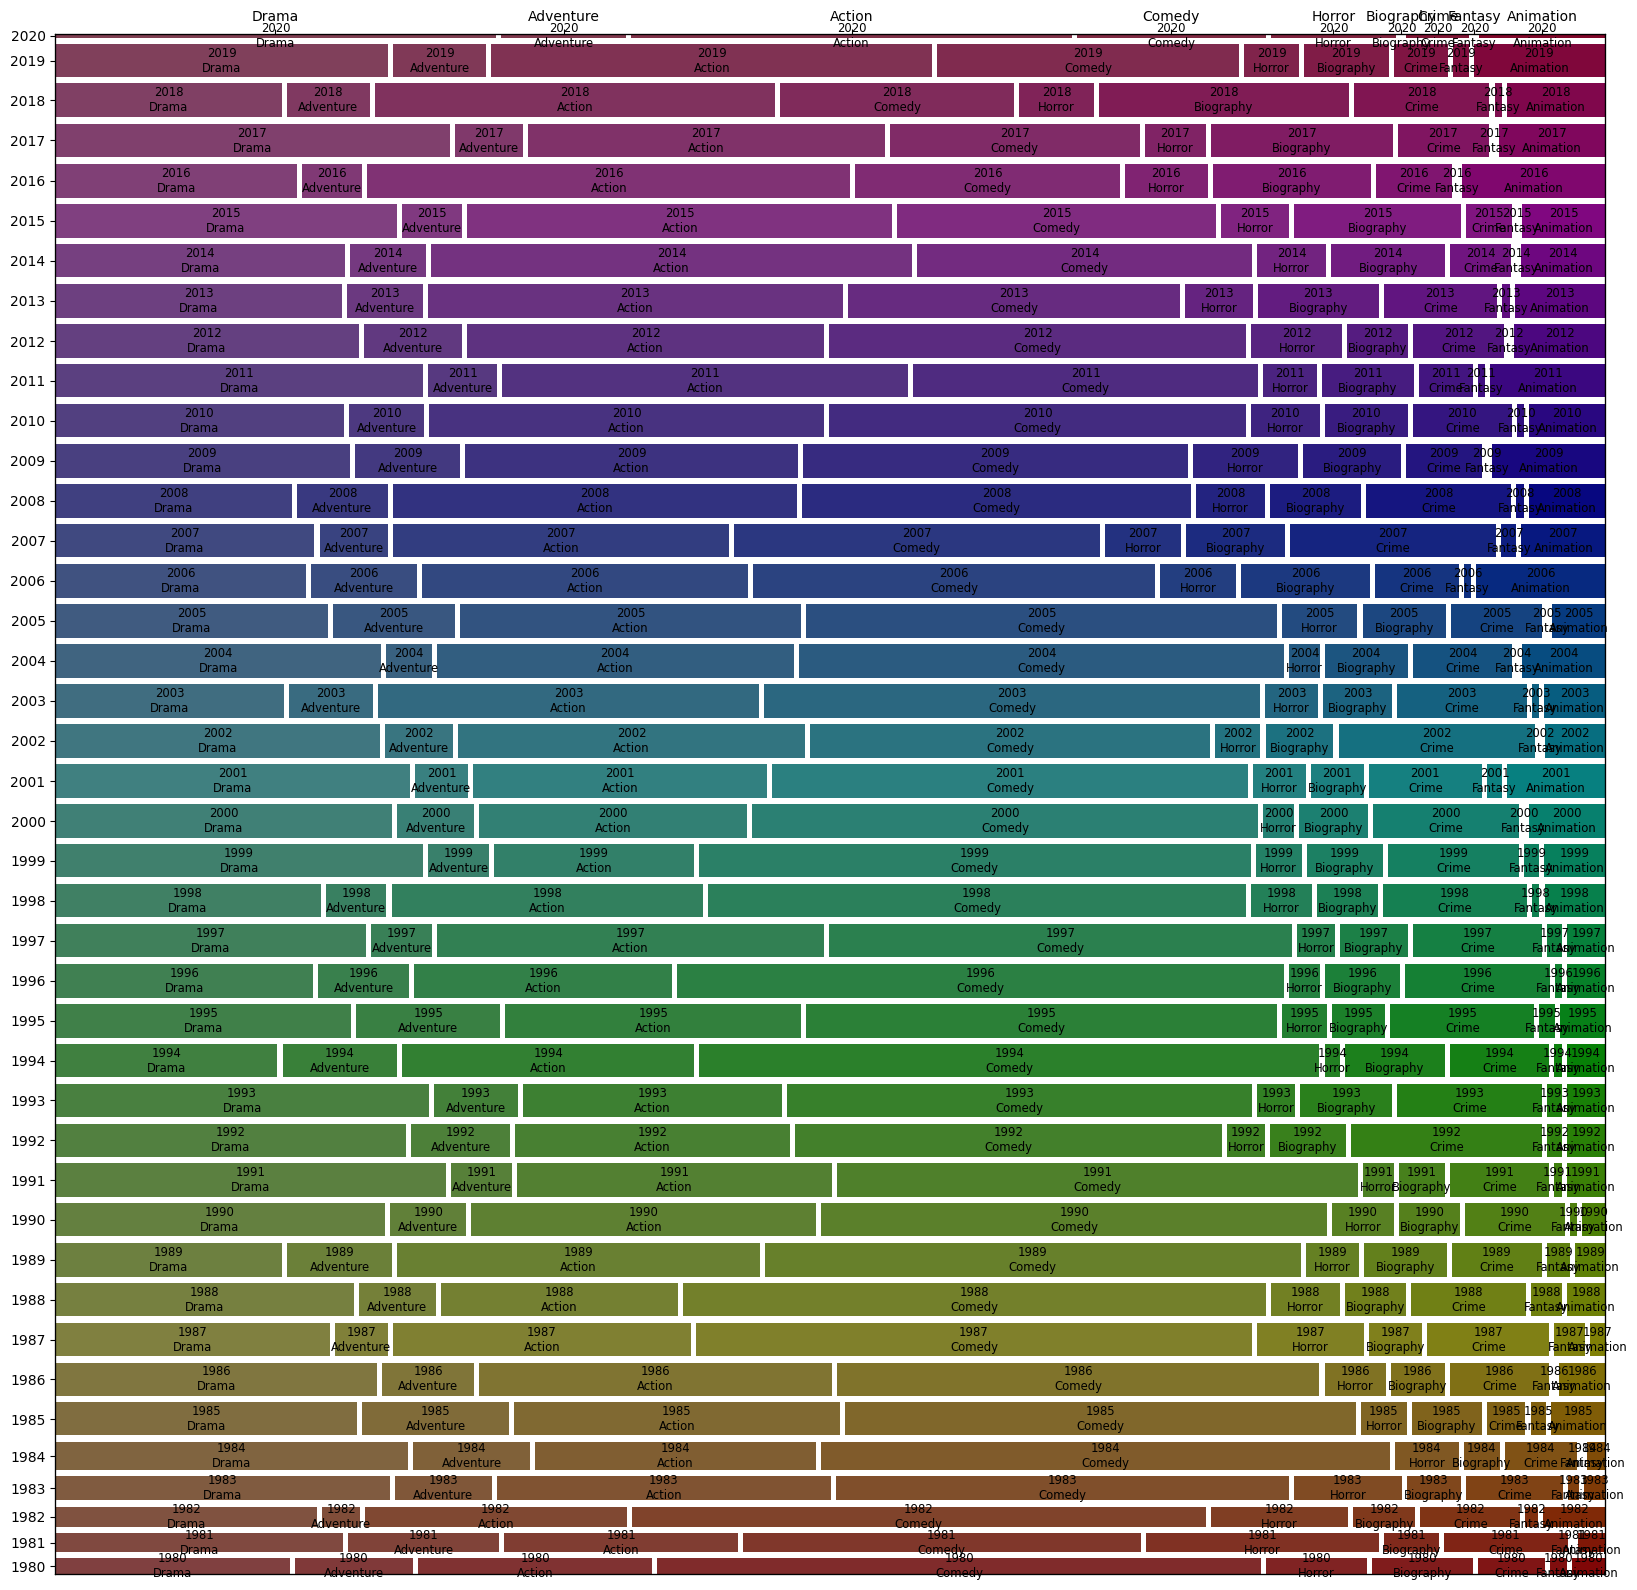

In [47]:
from statsmodels.graphics.mosaicplot import mosaic
genres_by_year = df.groupby(by='year')['genre'].count()
niche_genres = df['genre'].value_counts().reset_index(name='count')
niche_genres = niche_genres[niche_genres['count'] <= 20]
niche_genres = niche_genres['genre'].unique()
filtered_df = df[~df['genre'].isin(niche_genres)]

fig, ax = plt.subplots(figsize=(20, 20))
mosaic(filtered_df, ['year', 'genre'], ax=ax, horizontal=False)

> Notes: 
> - the mosaic plot above represents the popularity of different movie genres accross years
> - it does not include genres like `Musical` and few others because of their low popularity in order to make the plot more readable

## Interesting facts about movies


/tmp/ipykernel_28938/602936614.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<Axes: >

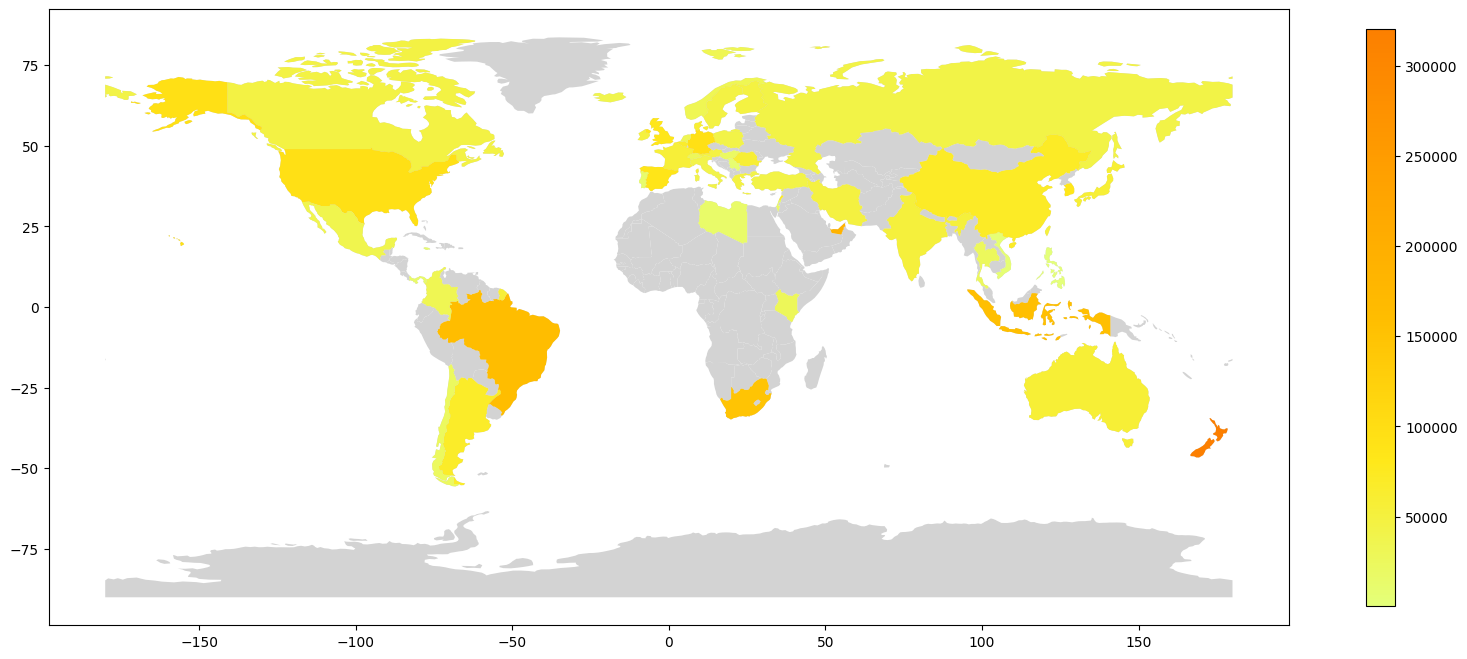

In [48]:
df['country'] = df['country'].replace('United States', 'United States of America')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'name', 'geometry']]
world.rename(columns={'name': 'country'}, inplace=True)

popularity_df = df[['country','votes']]
popularity_df = popularity_df.groupby('country').mean().reset_index()

merged = pd.merge(world, popularity_df, on='country')
fig, ax = plt.subplots(figsize=(20,15))
world.plot(figsize=(20,15), color='lightgray', ax=ax)
merged.plot(column="votes", legend=True, legend_kwds={'shrink': 0.5}, cmap='Wistia', figsize=(20,15), ax=ax)

> Notes:
> - the map above represents the average popularity (average number of votes) of movies produced in a given country
> - countries with the highest average popularity of the produced movies are `New Zeland`, `United Arab Emirates` or `Brazil`

In [49]:
merged.nlargest(10, 'votes')

,continent,country,geometry,votes
37,Oceania,New Zealand,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",320567.680000
17,Asia,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",188500.000000
10,South America,Brazil,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",159333.333333
2,Asia,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",156000.000000
8,Africa,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",146800.875000
1,North America,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",95147.498173
28,Europe,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",94233.333333
35,Europe,Spain,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",86091.489362
43,Europe,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",83989.251225
20,Asia,South Korea,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",82040.400000


Text(0.5, 1.0, 'The most popular movies')

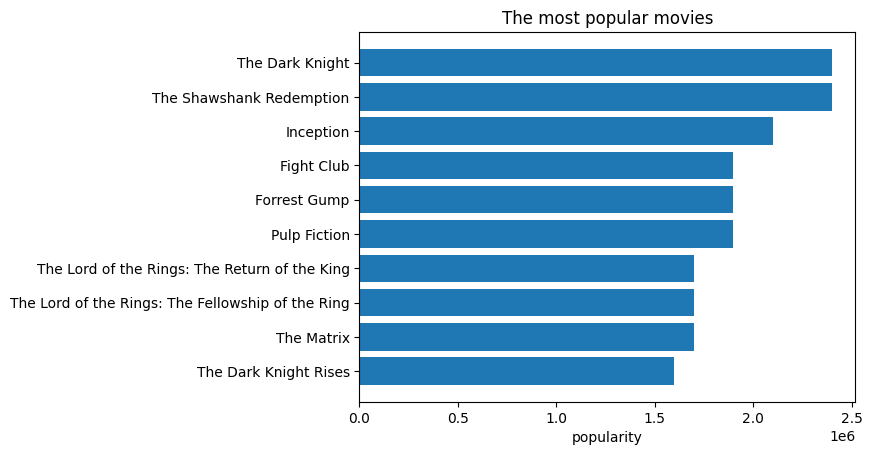

In [50]:
most_popular_movies = df.nlargest(10, 'votes')
most_popular_movies.sort_values(by='votes', inplace=True)
plt.barh(width=most_popular_movies['votes'], y=most_popular_movies['name'])
# plt.xticks(rotation=90, fontsize=8)
plt.xlabel('popularity')
plt.title('The most popular movies')

Text(0.5, 1.0, 'Most popular movie genres')

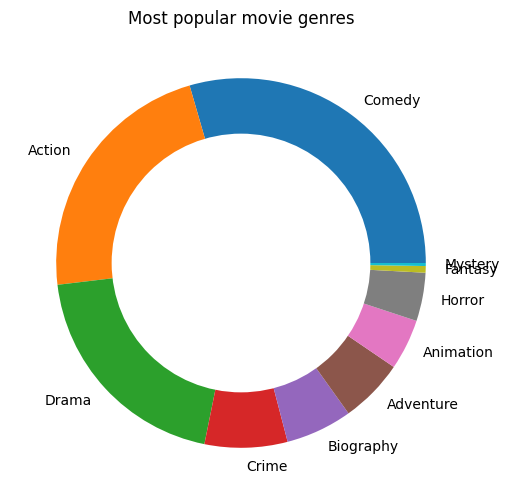

In [51]:
popular_genres_df = df['genre'].value_counts().reset_index(name='count')
popular_genres_df = popular_genres_df[popular_genres_df['count'] >= 20]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(popular_genres_df['count'], labels=popular_genres_df['genre'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_patch(centre_circle)
plt.title('Most popular movie genres')

>Notes: the most popular movie genres are `Comedy`, `Action` and `Drama`

Text(0.5, 0, 'Number of released movies')

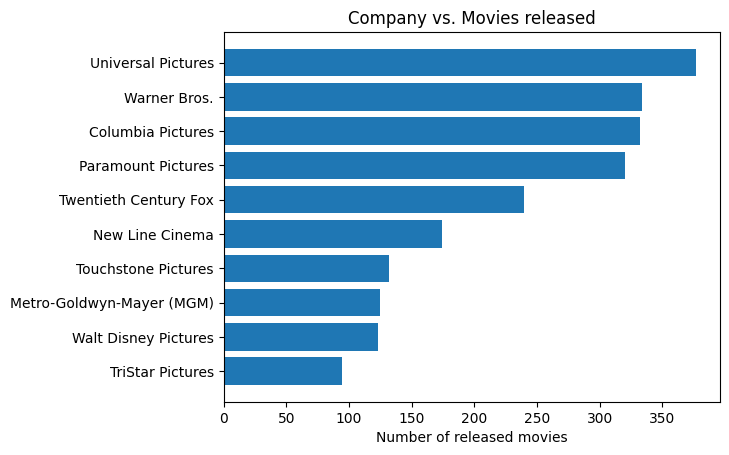

In [52]:
companies_df = df['company'].value_counts().reset_index(name='value')
companies_df = companies_df.head(10)
companies_df.sort_values(by='value', inplace=True)

plt.barh(y=companies_df['company'], width=companies_df['value'])
plt.title('Company vs. Movies released')
plt.xlabel("Number of released movies")

> Notes: as we can see, `Universal Pictures` produced the highest number of movies out of all other companies

In [53]:
df['ratio'] = df['gross'] / df['budget']
df.nlargest(5, 'ratio')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ratio
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States of America,15000.0,193355800.0,Solana Films,86.0,12890.386667
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States of America,60000.0,248639099.0,Haxan Films,81.0,4143.984983
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States of America,100000.0,42964410.0,New Line Cinema,81.0,429.644100
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000.0,2040920.0,Columbia Pictures,81.0,291.560000
5154,Once,R,Drama,2007,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000.0,20936722.0,Bórd Scannán na hÉireann,86.0,139.578147


> Notes:
> - there are movies like `Paranormal Activity` or `The Blair Witch Project` that managed to make huge money with relatively small budget 
> - in case of `Paranormal Activity` budget that was associated with this project resulted in revenue that was **12890** times bigger 